## Task1

In [8]:
tree.data<-read.csv('stembiomass.csv',sep = ';')
head(tree.data)

d    h    stem 
1 30.3 25.0 297.3
2 19.0 19.0  90.9
3 27.9 22.3 253.1
4 22.3 19.1 127.8
5 20.6 21.0 149.7
6 17.6 20.7 105.9

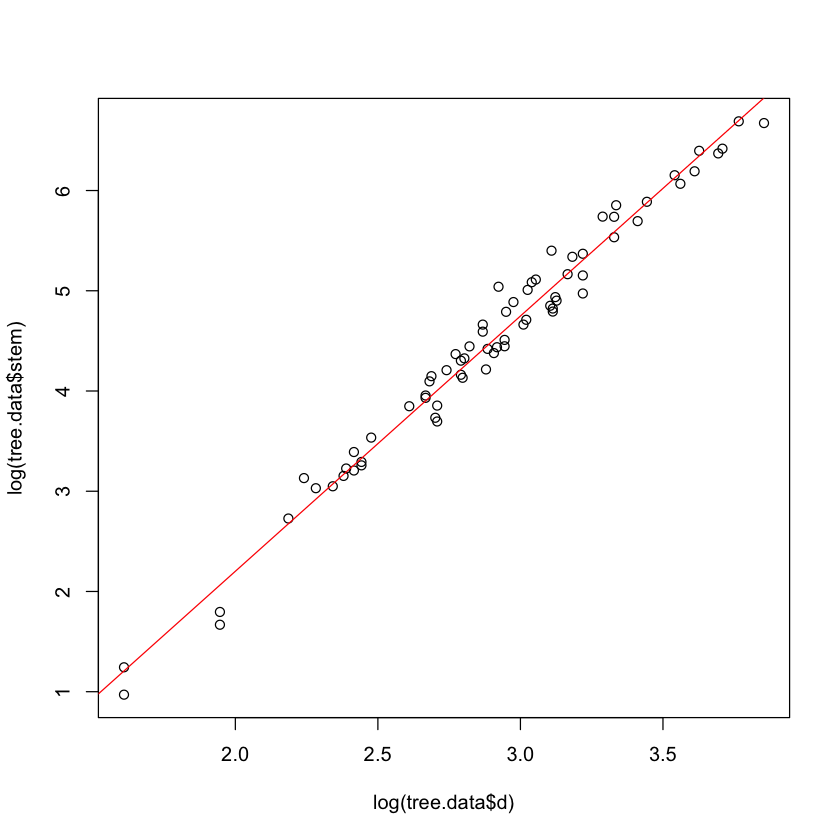

In [10]:
plot(log(tree.data$d),log(tree.data$stem))
lm<-lm(formula = I(log(tree.data$stem))~1+I(log(tree.data$d)))
abline(lm,col=2)

#### Calculation of the Prognose interval with $\alpha=0.05$ for the quasi lineare Modell:

In [11]:
stem.prognose<- predict(lm,interval = 'prediction', level=0.95)

Warning message in predict.lm(lm, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”


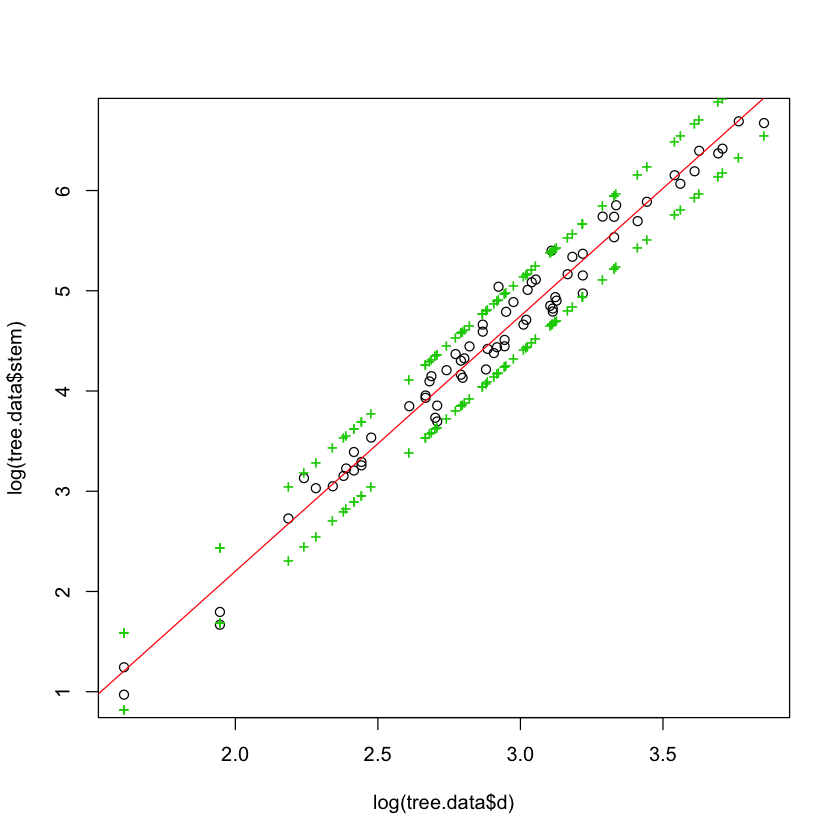

In [12]:
plot(log(tree.data$d),log(tree.data$stem))
abline(lm,col=2)

points(log(tree.data$d),stem.prognose[,2],col=3,pch='+')
points(log(tree.data$d),stem.prognose[,3],col=3,pch='+')

### js: to produce a true *prediction band* (*Prognosestreifen*) you should use the argument *newdata*

 **Displaying in the original scale**

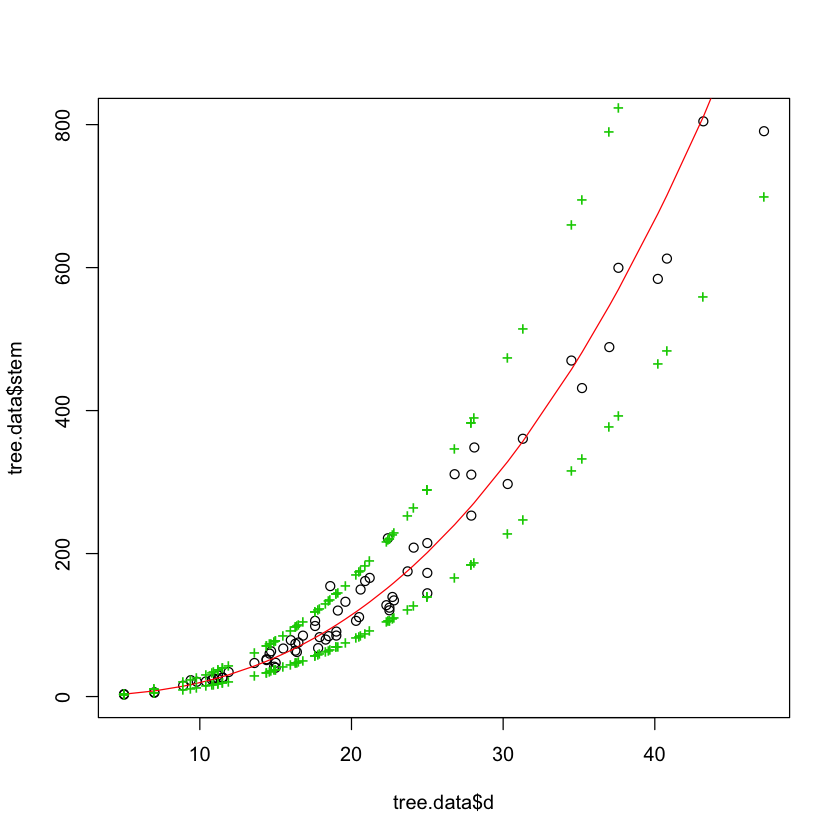

In [13]:
plot(tree.data$d,tree.data$stem)

beta0<-exp(lm$coefficients[1])
beta1<-lm$coefficients[2]

points(sort(tree.data$d),beta0*(sort(tree.data$d^beta1)),col=2,type = 'l')

points(tree.data$d,exp(stem.prognose[,2]),col=3,pch='+')
points(tree.data$d,exp(stem.prognose[,3]),col=3,pch='+')

###### Residual plot of the original scale:

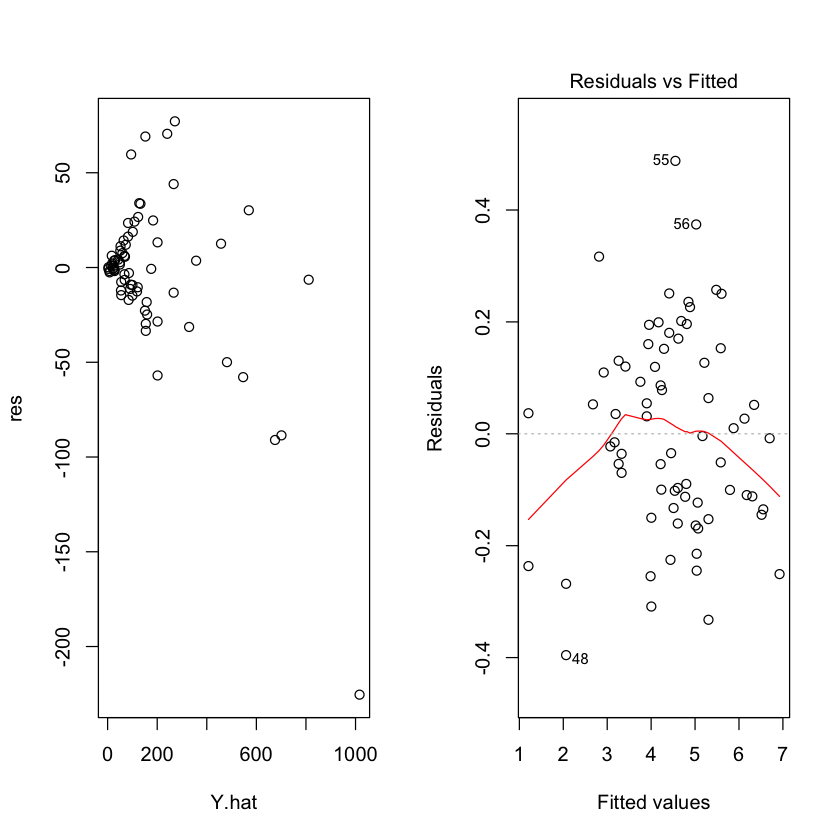

In [14]:
Y<-tree.data$stem
Y.hat<-beta0*(tree.data$d^beta1)
res<-Y-Y.hat

par(mfrow=c(1,2))
plot(Y.hat,res)
plot(lm,which=1)

**The apparent problem of this model is the assumption of a homogeneous variance.**

### js: 
* the left plot is on the original scale and therefore not useful for model diagnostics since we do our modelling on the log scale
* if you look closer, the apparent variance heterogeneity is rather: negative deviations left and right, positive deviations in the middle
* this indicates nonlinearity/quadratic relationship between log(d) and log(stem)
* 3/4

## Task2 

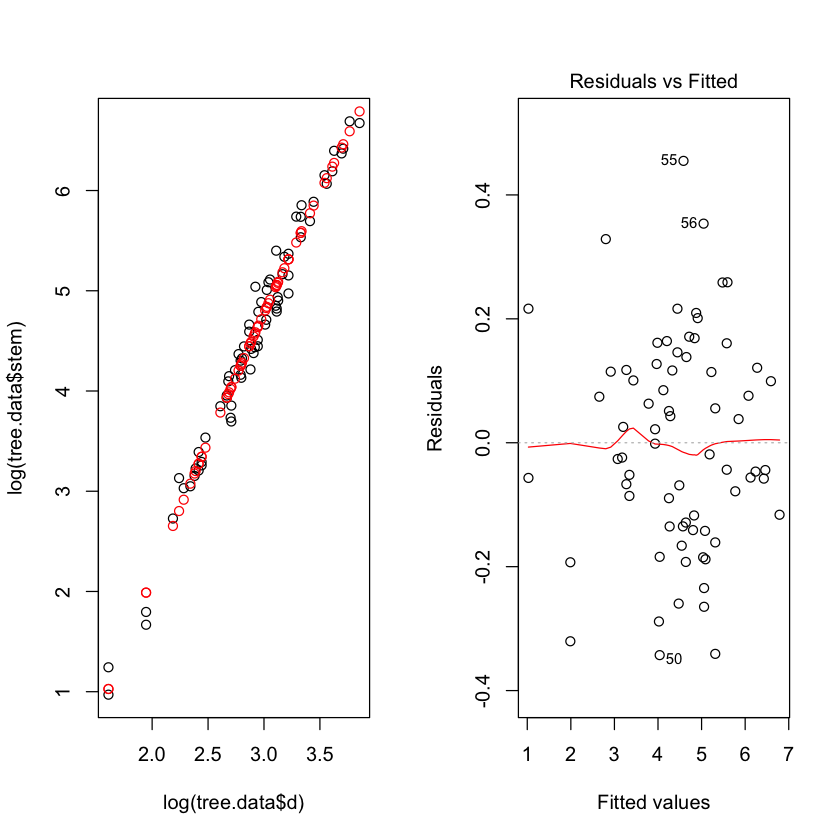

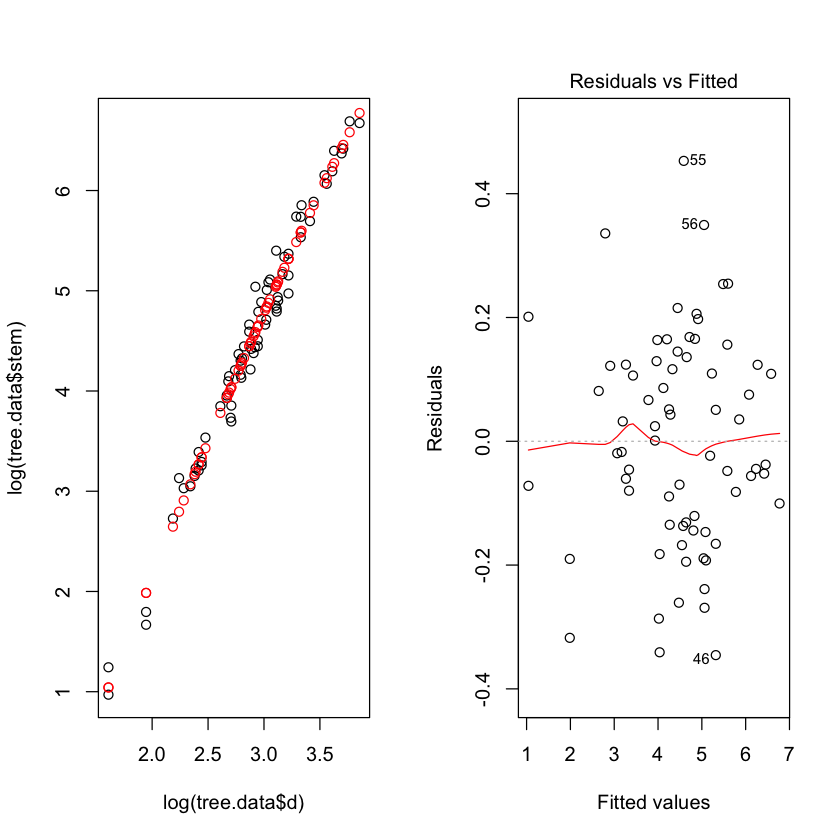

In [16]:
lm2<-lm(formula = I(log(tree.data$stem))~1+I(log(tree.data$d))+I(log(tree.data$d)^2))
lm3<-lm(formula = I(log(tree.data$stem))~1+I(log(tree.data$d))+I(log(tree.data$d)^2)+I(log(tree.data$d)^3))

par(mfrow=c(1,2))
plot(log(tree.data$d),log(tree.data$stem))
points(log(tree.data$d),predict(lm2),col=2)
plot(lm2,which=1)


plot(log(tree.data$d),log(tree.data$stem))
points(log(tree.data$d),predict(lm3),col=2)
plot(lm3,which=1)


beta0.2<-exp(lm2$coefficients[1])
beta1.2<-lm2$coefficients[2]
beta2.2<-lm2$coefficients[3]

beta0.3<-exp(lm3$coefficients[1])
beta1.3<-lm3$coefficients[2]
beta2.3<-lm3$coefficients[3]
beta3.3<-lm3$coefficients[4]

**Plotting in the original scale:**

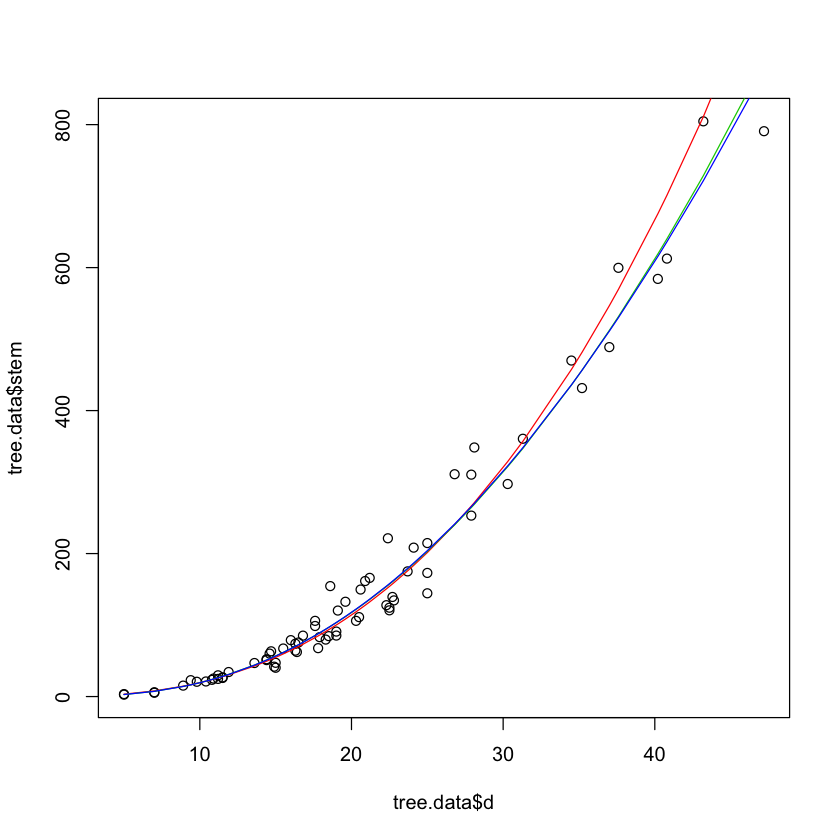

In [17]:
plot(tree.data$d,tree.data$stem)

reg1<-beta0*(sort(tree.data$d)^beta1)

reg2<-beta0.2*(sort(tree.data$d)^(beta1.2+beta2.2*log(sort(tree.data$d))))

reg3<-beta0.3*(sort(tree.data$d)^(beta1.3+beta2.3*log(sort(tree.data$d))+beta3.3*log(sort(tree.data$d))^2))

points(sort(tree.data$d),reg1,col=2,type='l')
points(sort(tree.data$d),reg2,col=3,type='l')
points(sort(tree.data$d),reg3,col=4,type='l')

From the above plot we cannot really tell which straight line is "the best". 

Calculating the prediction intervals will help get some clarity:

Warning message in predict.lm(lm2, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”
Warning message in predict.lm(lm3, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”


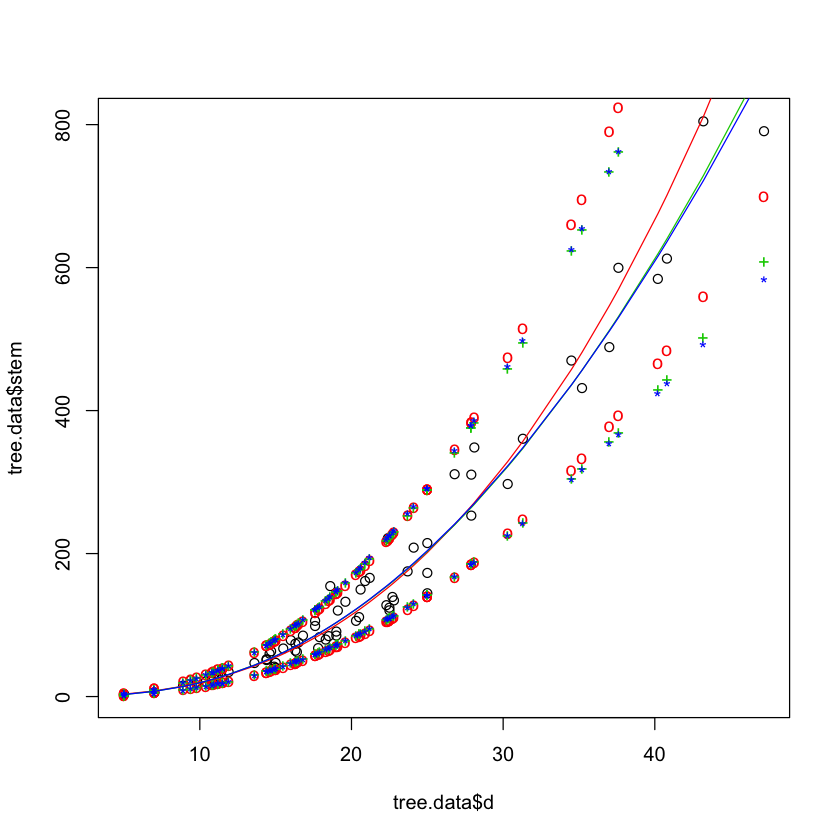

In [18]:
stem.prognose2<- predict(lm2,interval = 'prediction', level=0.95)
stem.prognose3<- predict(lm3,interval = 'prediction', level=0.95)

plot(tree.data$d,tree.data$stem)

#first model
points(sort(tree.data$d),reg1,col=2,type='l')
points(tree.data$d,exp(stem.prognose[,2]),col=2,pch='o')
points(tree.data$d,exp(stem.prognose[,3]),col=2,pch='o')

#second model
points(sort(tree.data$d),reg2,col=3,type='l')
points(tree.data$d,exp(stem.prognose2[,2]),col=3,pch='+')
points(tree.data$d,exp(stem.prognose2[,3]),col=3,pch='+')

#third model
points(sort(tree.data$d),reg3,col=4,type='l')
points(tree.data$d,exp(stem.prognose3[,2]),col=4,pch='*')
points(tree.data$d,exp(stem.prognose3[,3]),col=4,pch='*')

### js: prediction intervals were asked for at the log-scale

On the basis of this representation it is not still easier to determine a 'better' or 'worse'.

So we return back to guessing the residual plot:

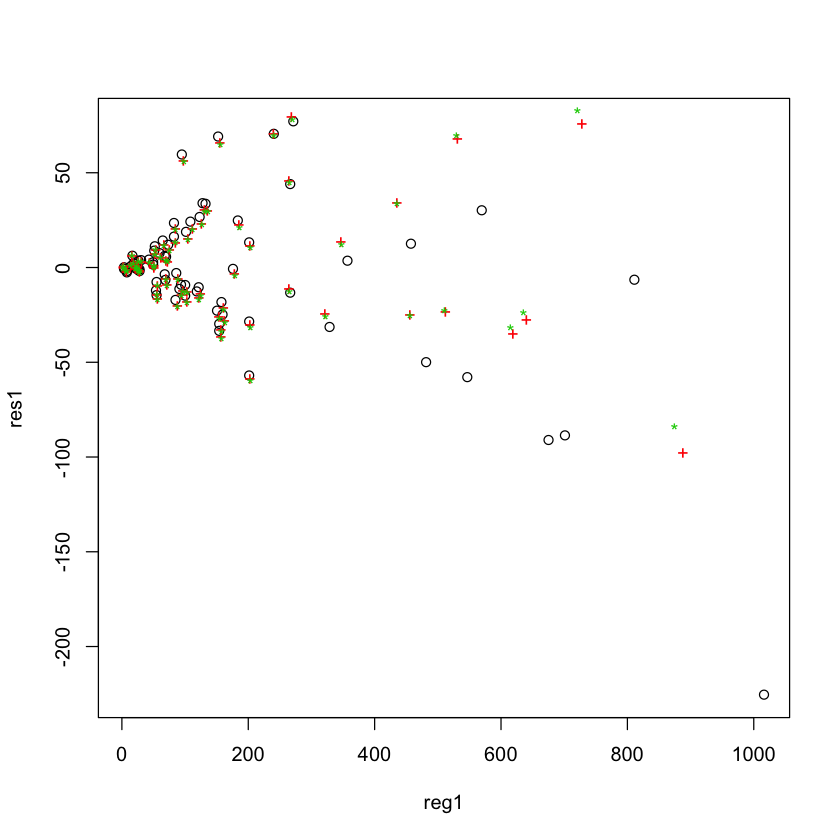

In [19]:
res1<-tree.data$stem[sort(tree.data$d,index.return=T)$ix]-reg1
res2<-tree.data$stem[sort(tree.data$d,index.return=T)$ix]-reg2
res3<-tree.data$stem[sort(tree.data$d,index.return=T)$ix]-reg3

plot(reg1, res1)
points(reg2, res2, col=2,pch='+')
points(reg3, res3, col=3,pch='*')

It seems that the residuals of the third model vary the least.

This is reflected in various statistics on residuals:

In [20]:
m1<-mean(res1)
m2<-mean(res2)
m3<-mean(res3)

v1<-var(res1)
v2<-var(res2)
v3<-var(res3)

s1<-sum(abs(res1))
s2<-sum(abs(res2))
s3<-sum(abs(res3))

df<-data.frame(c(m1,m2,m3),c(v1,v2,v3),c(s1,s2,s3),row.names = c('first model','second model','third model'))
names(df)<-c('mean','variance','abs sum')
df


mean      variance  abs sum 
first model  -3.482366 1583.2271 1595.106
second model  1.593370  884.2610 1429.893
third model   1.786987  855.9307 1416.902

#### Based on these statistics I would go for the last model, because it is the model with least variance.

### js:
* again - as we are doing our modelling exercise on the log-scale, arguments against/in favor should be found at that scale
* the mean of residuals is equal to zero for all models and therefore not useful in model selction
* the variance of residuals is automatically reduced with every additional parameter and therefore not useful in model selection
* the same is true for the absolute residuals
* 3/6
